In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import math

In [15]:
def load_image(img_path):
    image = Image.open(img_path)
    return image

In [16]:
image = load_image('Lenna_(test_image).png')
image = image.convert('L')
array_image = np.array(image)

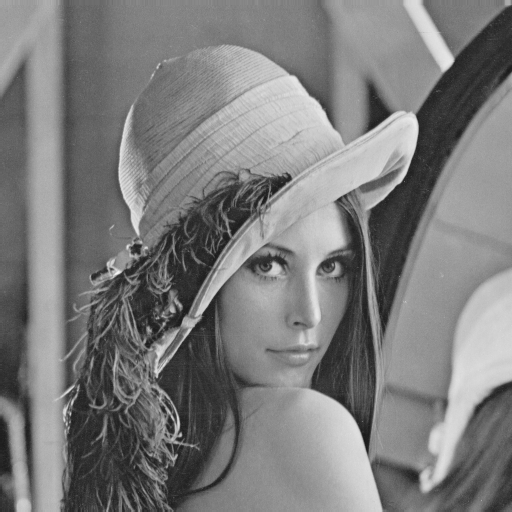

In [17]:
image

# Convolutional filters 

In [22]:
kernels = {
    "Gaussian Blur": (1/16) * np.array([[1, 2, 1],
                                        [2, 4, 2],
                                        [1, 2, 1]]),
    "Prewitt Horizontal": np.array([[-1, 0, 1],
                                     [-1, 0, 1],
                                     [-1, 0, 1]]),
    "Prewitt Vertical": np.array([[1, 1, 1],
                                   [0, 0, 0],
                                   [-1, -1, -1]]),
    "Sobel Horizontal": np.array([[-1, 0, 1],
                                   [-2, 0, 2],
                                   [-1, 0, 1]]),
    "Sobel Vertical": np.array([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]]),
    "Laplacian": np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])
}

In [23]:
def convolution(image, kernel):
 
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    

    result = np.zeros_like(image)
    
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            
            result[i, j] = np.sum(region * kernel)
    
    return result

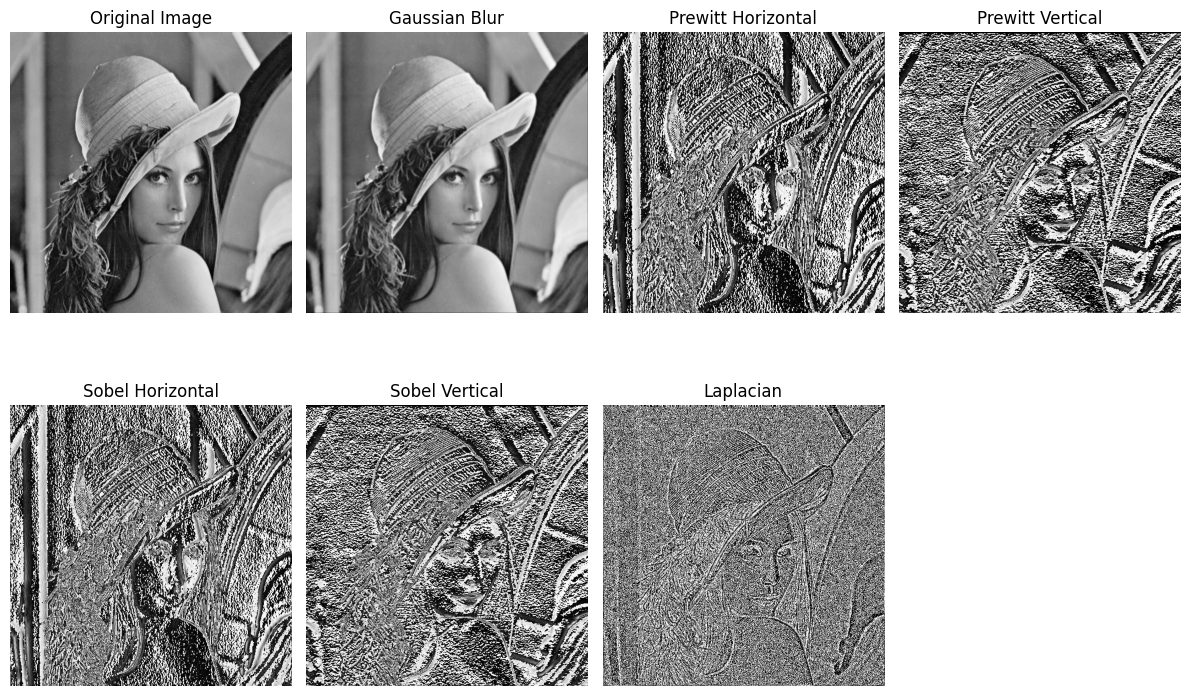

In [24]:
results = {name: convolution(array_image, kernel) for name, kernel in kernels.items()}

plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.imshow(array_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for idx, (name, result) in enumerate(results.items(), start=2):
    plt.subplot(2, 4, idx)
    plt.imshow(np.clip(result, 0, 255), cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Median filter

In [30]:
def median_filter(image, kernel_size):

    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            window = padded_image[i:i + kernel_size, j:j + kernel_size]

            filtered_image[i, j] = np.median(window)

    return filtered_image

In [45]:
median_result = median_filter(array_image, kernel_size=3)

In [46]:
def display_comparison(original, filtered, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

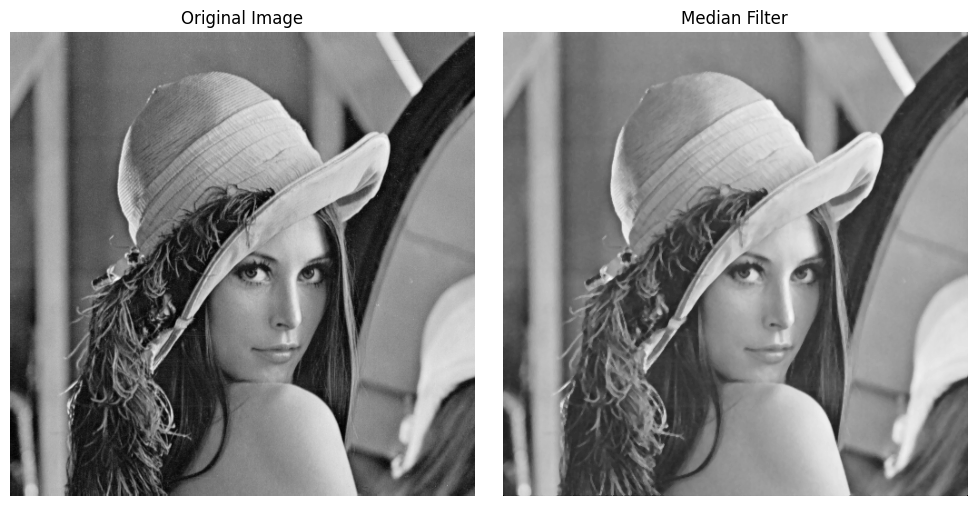

In [47]:
display_comparison(image, median_result, "Median Filter")

# Pixelation

In [48]:
def pixelate(image, block_size):

    output = image.copy()
    h, w = image.shape[:2]

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):

            block = image[y:y+block_size, x:x+block_size]

            avg_color = np.mean(block, axis=(0, 1)).astype(image.dtype)
            output[y:y+block_size, x:x+block_size] = avg_color

    return output

In [51]:
pixelated_result = pixelate(array_image, block_size=4)

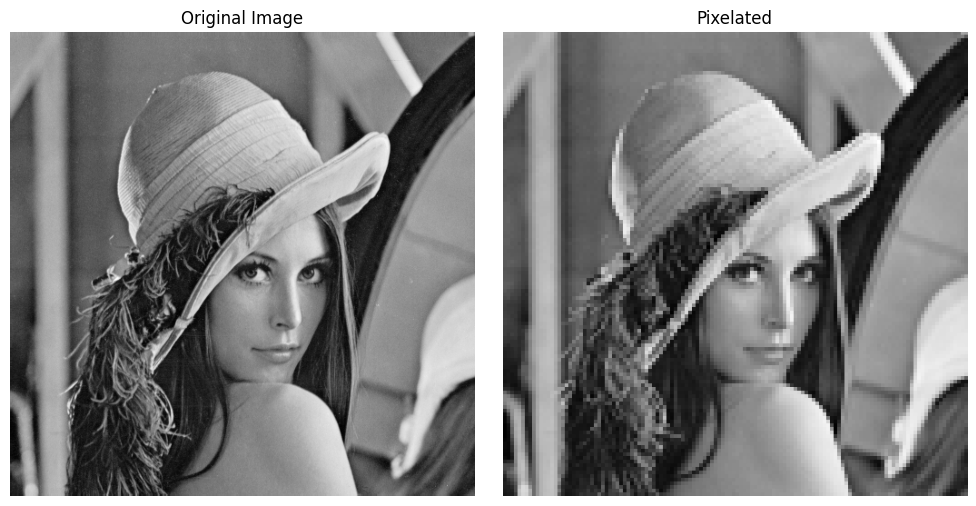

In [52]:
display_comparison(image, pixelated_result, "Pixelated")

# Kuwahara filter

In [56]:
def kuwahara_filter(image, kernel_size):

    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            h, w = region.shape
            subregions = [
                region[:h//2+1, :w//2+1],  
                region[:h//2+1, w//2:],    
                region[h//2:, :w//2+1],  
                region[h//2:, w//2:]       
            ]
            # Compute mean and variance for each subregion
            means = [np.mean(sub) for sub in subregions]
            variances = [np.var(sub) for sub in subregions]
            # Choose the mean of the subregion with the smallest variance
            filtered_image[i, j] = means[np.argmin(variances)]

    return filtered_image

In [57]:
kuwahara_result = kuwahara_filter(array_image, kernel_size=5)

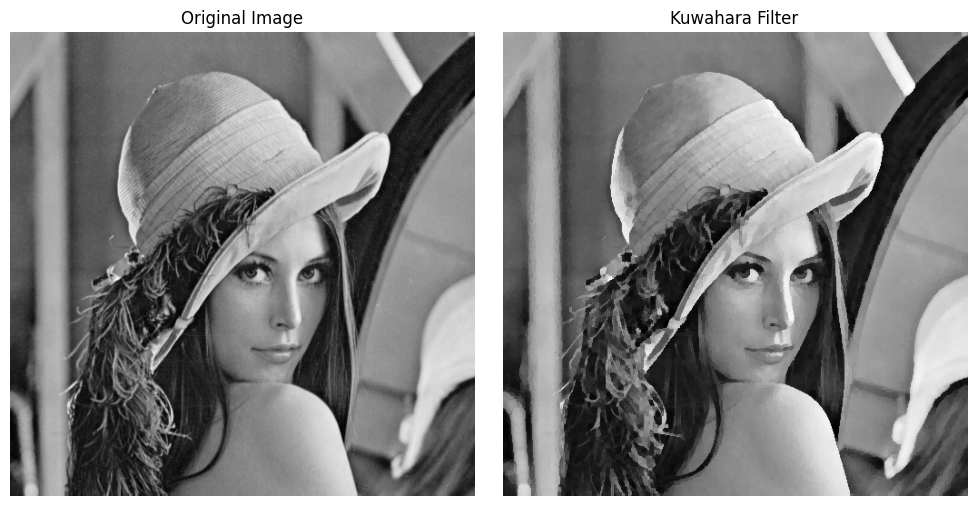

In [58]:
display_comparison(image, kuwahara_result, "Kuwahara Filter")